In [6]:
# importing necessary tools for analysis
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import matplotlib as mpl
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Let's import the dataset we'll be working with
datafile = pd.read_excel('epl_20_21.xlsx')
df1 = DataFrame(datafile)

# First, let's take a look at the top scoring clubs for the 2020/21 season

# let's group the dataframe by Club and sum its rows
df1_sum = df1.groupby(['Club']).sum()

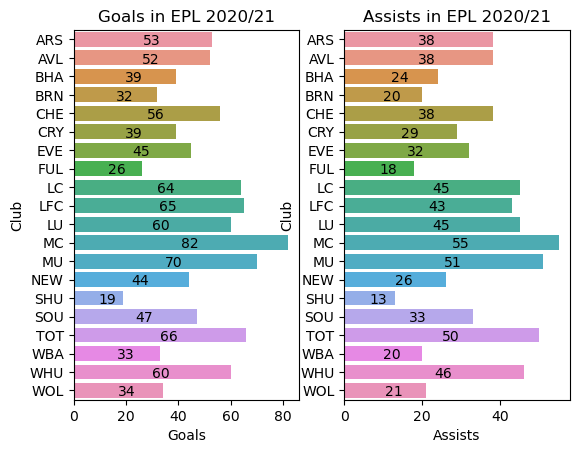

In [3]:
# let's create a 1x2 subplot comparing total goals and total assists by Club
fig, ax = plt.subplots(1,2)
sns.barplot(data = df1_sum, x = 'Goals', y = df1_sum.index,ax = ax[0]).set_title('Goals in EPL 2020/21')
sns.barplot(data = df1_sum, x = 'Assists', y = df1_sum.index, ax = ax[1]).set_title('Assists in EPL 2020/21')

# and let's add annotations to each bar that display the respective values for each Club
for i in range(len(df1_sum)):
    ax[0].text(df1_sum['Goals'][i]/2,i+.3,df1_sum['Goals'][i])
    ax[1].text(df1_sum['Assists'][i]/2,i+.3,df1_sum['Assists'][i])

Text(0.5, 1.0, 'Goals & Assists vs Placement')

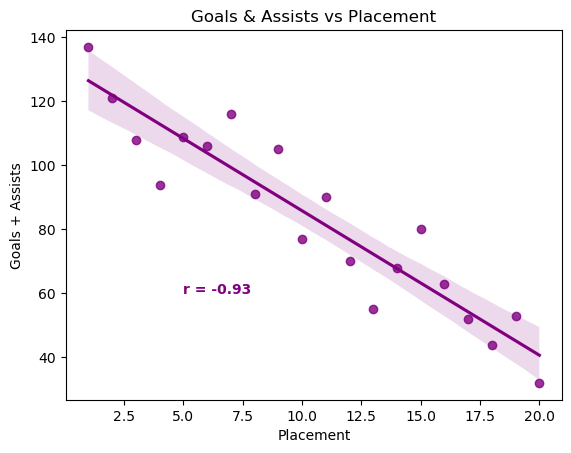

In [4]:
# as we can see Manchester City scored and assisted on the most goals in the 2020/21 season

#now let's load the premier league standings for the 2020/2021 season
datafile2 = pd.read_excel('epl_20_21_standings.xlsx')
df2 = DataFrame(datafile2)

# now let's compare teams goals + assists to where they finished in the table

df1_sum['Goals + Assists'] = df1_sum['Goals'] + df1_sum['Assists']
df1_sum_sort = df1_sum.sort_values('Goals + Assists',ascending=False)['Goals + Assists']

# join our two datasets on Club
joined = pd.merge(df1_sum_sort,df2,how='outer',on='Club')

#graph Goals + Assists vs Placement w/ r-coefficient to see correlation
r,s = stats.pearsonr(joined['Placement'],joined['Goals + Assists'])
myplot1 =sns.regplot(data=joined,x = joined['Placement'], y=joined['Goals + Assists'],color='purple')
myplot1.text(5,60,'r = {}'.format(r.round(2)),color='purple',weight='semibold')
myplot1.set_title('Goals & Assists vs Placement')

In [71]:
# A negative r-value close to 1 is good because you want your placement to be lower (i.e. 1 is better than 20 in this case)
# So, we can conclude that placement and goals+assists are fairly strongly correlated which suggests 

# Now let's take a look at the top-performing attacker for each team

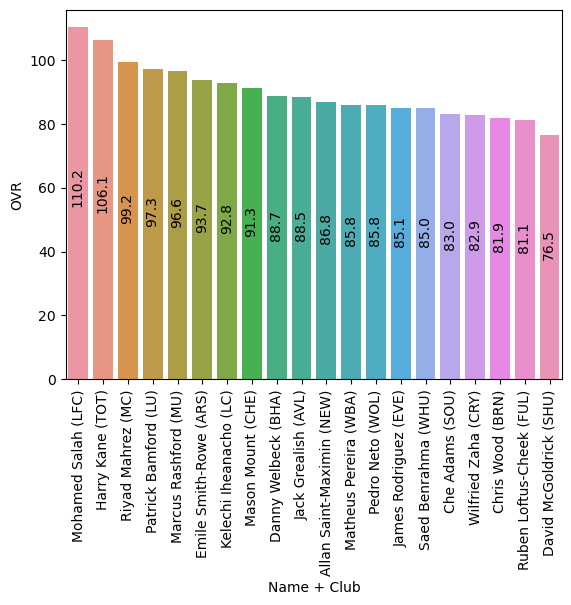

In [5]:
# For this, I'm creating an arbitrary variable called 'OVR' (goals+assists+pass percentage-red cards where matches greater than 18)
df3 = df1
#create variable OVR
df3['OVR'] = (df3['Goals']+df3['Assists']+df3['Perc_Passes_Completed']-df3['Yellow_Cards']-df3['Red_Cards'])

# select only players that are classifed as an attacker and played more than 18 matches
fwd_only = df3[(df3['Position'].str.contains('FW') == True) & (df3['Matches']>18)]

# sort values based on OVR and keep only top performer on each team
fwd_sorted = fwd_only.sort_values('OVR',ascending=False).drop_duplicates('Club')

#create Name + CLub column for x-axis 
df3['Name + Club'] = df3['Name']+' ('+df3['Club']+')'

#plot graph and add data labels
ax = sns.barplot(data=fwd_sorted, x = 'Name + Club', y = 'OVR')
plt.xticks(rotation=90)
for i in range(len(fwd_sorted)):
    j = fwd_sorted.index[i]
    ax.text(i-.3,fwd_sorted['OVR'][j]/2,fwd_sorted['OVR'][j],rotation=90)

In [64]:
#now I want to look at a player's expected goals compared to their actual goals
df3['xG for Season'] = df3['Mins']/90 * df3['xG per Game']
frames = [df3['Name'],df3['Club'],df3['Goals']-df3['xG for Season']]
df4 = pd.concat(frames,axis=1).rename(columns={'Name':'Name','Club':'Club',0:'Goals - xG'})
df4.sort_values('Goals - xG',ascending=False)

,Name,Club,Goals - xG
161,Son Heung-min,TOT,6.620000
175,Gareth Bale,TOT,5.684444
307,Joe Willock,NEW,4.414000
120,Kelechi Iheanacho,LC,4.218667
33,Ilkay Gundogan,MC,3.982222
...,...,...,...
86,Sadio Mane,LFC,-4.298889
236,Richarlison,EVE,-4.444000
110,Jamie Vardy,LC,-4.564444
400,Neal Maupay,BHA,-4.839111


In [11]:
# players from which country have the most playing time per player
df5 = df3.groupby('Nationality')['Mins'].sum()
df6 = pd.DataFrame(df3.groupby('Nationality')['Name'].count())

df6.columns = ['Count']
frames2 = [df5,df6]
df8 = pd.concat(frames2,axis=1)
df9 = df8[df8['Count']>4]
(df9['Mins']/df9['Count']).sort_values(ascending=False).head()

Nationality
SEN    2264.800000
DEN    2256.166667
NIR    2059.800000
POL    1887.600000
POR    1725.809524
dtype: float64

Text(0.5, 1.0, 'Age of Players')

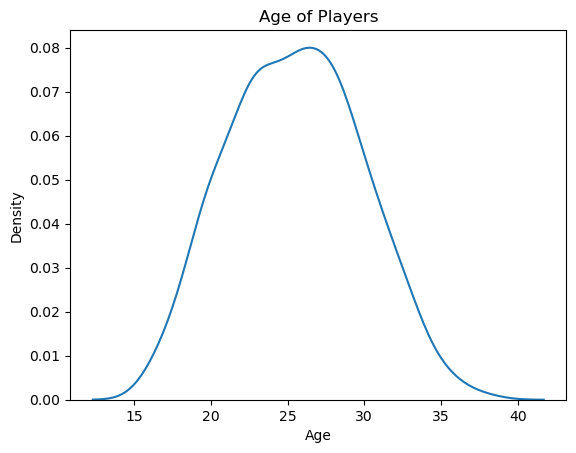

In [19]:
sns.kdeplot(df1['Age']).set_title('Age of Players')